In [ ]:
# Title

In [1]:
print("Project on Customer Segmentation")

Project on Customer Segmentation


In [ ]:
# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from datetime import timedelta
import squarify
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [ ]:
# Loading dataset 

In [2]:
data=pd.read_csv("C://Users//acer//Desktop//Intern//ecommerce-data//data.csv",encoding = 'unicode_escape')

In [ ]:
# A glance at few rows from top

In [5]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# A glance at few rows from bottom

In [6]:
data.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [ ]:
# Basic stats value 

In [8]:
data.describe(include=["int64","float64","object"])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [ ]:
# A brief summary of data

In [10]:
pd.DataFrame({"Total Missing":data.isna().sum(),"% Missing":data.isna().mean(),"DataType":data.dtypes,"Unique":data.nunique()})

,Total Missing,% Missing,DataType,Unique
InvoiceNo,0,0.000000,object,25900
StockCode,0,0.000000,object,4070
Description,1454,0.002683,object,4223
Quantity,0,0.000000,int64,722
InvoiceDate,0,0.000000,object,23260
UnitPrice,0,0.000000,float64,1630
CustomerID,135080,0.249267,float64,4372
Country,0,0.000000,object,38


In [ ]:
# changing the case to lower of all columns names

In [ ]:
data.columns=map(str.lower,data.columns)

In [ ]:
# converting invoice date to date time from object

In [7]:
data["invoicedate"]=pd.to_datetime(data['invoicedate'])

In [ ]:
# Dropping all rows containing null values

In [8]:
data.dropna(inplace=True)

In [ ]:
# Lets see the new shape of dataset

In [9]:
data.shape

(406829, 8)

In [ ]:
# creating a new columns as total sales

In [11]:
data["total sales"]=data["unitprice"]+data["quantity"]

In [14]:
snapshot_date=data['invoicedate'].max() + timedelta(days=1)
print(snapshot_date)

2011-12-10 12:50:00


In [16]:
data_group = data.groupby(['customerid']).agg({
        'invoicedate': lambda x: (snapshot_date - x.max()).days,
        'invoiceno': 'count',
        'total sales': 'sum'})

In [ ]:
# renaming columns

In [17]:
data_group.rename(columns={'invoicedate': 'Recency',
                         'invoiceno': 'Frequency',
                         'total sales': 'MonetaryValue'}, inplace=True)

In [ ]:
# Lets look at the data

In [18]:
data_group.head(6)

,Recency,Frequency,MonetaryValue
customerid,,,
12346.0,326,2,2.08
12347.0,2,182,2939.21
12348.0,75,31,2519.71
12349.0,19,73,1236.10
12350.0,310,17,262.30
12352.0,36,95,2681.10


In [ ]:
# Plotting rececy,frequency and monetary value on dist plot

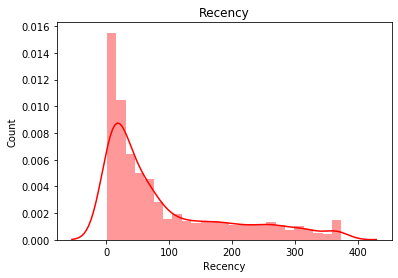

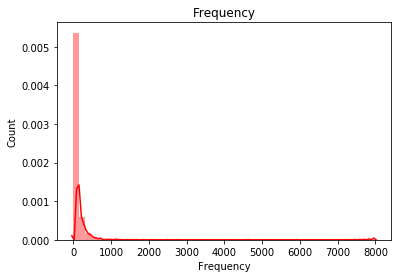

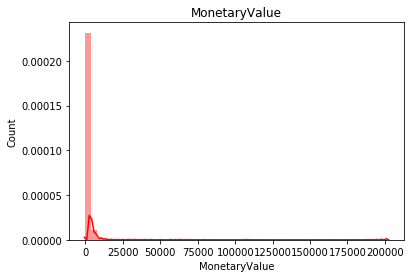

In [22]:
for features in data_group.columns:
    data=data_group.copy()
    sns.distplot(data_group[features],color="red")
    plt.xlabel(features)
    plt.ylabel("Count")
    plt.title(features)
    plt.show()

In [ ]:
# Calculate R and F

In [23]:
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_group['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_group['Frequency'], q=4, labels=f_labels)
# Create new columns R and F 
data_group = data_group.assign(R = r_groups.values, F = f_groups.values)
data_group.head()

,Recency,Frequency,MonetaryValue,R,F
customerid,,,,,
12346.0,326,2,2.08,1,1
12347.0,2,182,2939.21,4,4
12348.0,75,31,2519.71,2,2
12349.0,19,73,1236.10,3,3
12350.0,310,17,262.30,1,1


In [ ]:
# Create labels for MonetaryValue

In [24]:
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_group['MonetaryValue'], q=4, labels=m_labels)
# Create new column M
data_group = data_group.assign(M = m_groups.values)

In [25]:
data_group.head(5)

,Recency,Frequency,MonetaryValue,R,F,M
customerid,,,,,,
12346.0,326,2,2.08,1,1,1
12347.0,2,182,2939.21,4,4,4
12348.0,75,31,2519.71,2,2,4
12349.0,19,73,1236.10,3,3,3
12350.0,310,17,262.30,1,1,2


In [ ]:
# Concat RFM quartile values to create RFM Segments

In [26]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
data_group['RFM_Segment_Concat'] = data_group.apply(join_rfm, axis=1)
rfm = data_group
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
customerid,,,,,,,
12346.0,326,2,2.08,1,1,1,111
12347.0,2,182,2939.21,4,4,4,444
12348.0,75,31,2519.71,2,2,4,224
12349.0,19,73,1236.10,3,3,3,333
12350.0,310,17,262.30,1,1,2,112


In [ ]:
# Count num of unique segments

In [27]:
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

59


In [ ]:
# Calculate RFM_Score

In [28]:
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

customerid
12346.0     3.0
12347.0    12.0
12348.0     8.0
12349.0     9.0
12350.0     4.0
Name: RFM_Score, dtype: float64


In [ ]:
# Define rfm_level function

In [29]:
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
customerid,,,,,,,,,
12346.0,326,2,2.08,1,1,1,111,3.0,Require Activation
12347.0,2,182,2939.21,4,4,4,444,12.0,Can't Loose Them
12348.0,75,31,2519.71,2,2,4,224,8.0,Champions
12349.0,19,73,1236.10,3,3,3,333,9.0,Can't Loose Them
12350.0,310,17,262.30,1,1,2,112,4.0,Needs Attention


In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 

In [30]:
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them      25.4     196.3        3068.4  1689
Champions             62.3      56.5         817.4   474
Loyal                 79.7      38.6         591.9   433
Needs Attention      162.1      13.6         176.2   379
Potential            101.5      28.2         499.0   487
Promising            146.8      20.0         278.2   477
Require Activation   264.7       8.0         106.1   433


In [ ]:
# Applying K means clustering 

In [ ]:
# creating a copy of original dataset

In [35]:
rfm_new=rfm

In [ ]:
# encoding the RFM level 

In [40]:
le=LabelEncoder()
rfm_new["RFM_Level"]=le.fit_transform(rfm_new["RFM_Level"])

In [39]:
# Lets look at the dataset

In [41]:
rfm_new.head(5)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
customerid,,,,,,,,,
12346.0,326,2,2.08,1,1,1,111,3.0,6
12347.0,2,182,2939.21,4,4,4,444,12.0,0
12348.0,75,31,2519.71,2,2,4,224,8.0,1
12349.0,19,73,1236.10,3,3,3,333,9.0,0
12350.0,310,17,262.30,1,1,2,112,4.0,3


In [43]:
rfm_new["RFM_Level"].unique()

array([6, 0, 1, 3, 2, 4, 5], dtype=int64)

In [ ]:
# find the appropriate cluster number 

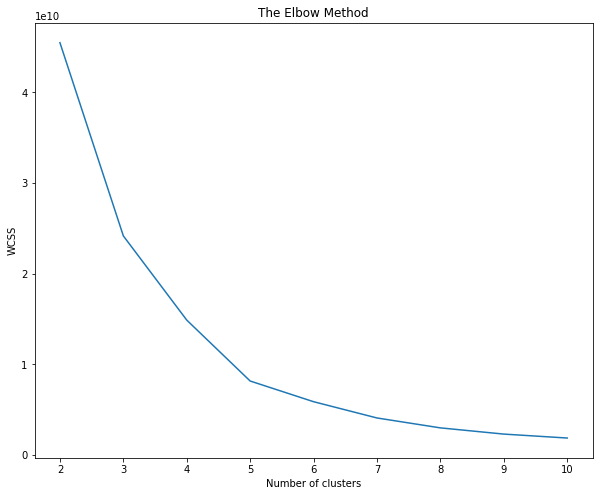

In [42]:
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(rfm_new)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# we can clearly see that it segregates in 7 different groups

In [ ]:
# Printing the wcss scores

In [45]:
print(wcss)

[45497245628.695984, 24171674875.484734, 14880166235.40965, 8155987923.296706, 5873701424.345295, 4077329114.9623995, 2984398445.4384766, 2298016703.5870423, 1863665116.6656017]


In [47]:
for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    pred = kmeans.fit_predict(rfm_new)
    score = silhouette_score (rfm_new, pred, metric='euclidean')
    wcss = kmeans.inertia_
    print("For n_clusters = {}, silhouette score is {} and WCSS is {})".format(i, score,wcss))

For n_clusters = 2, silhouette score is 0.9737080283974071 and WCSS is 45497245628.695984)
For n_clusters = 3, silhouette score is 0.966098896586011 and WCSS is 24171674875.484734)
For n_clusters = 4, silhouette score is 0.8615523999280182 and WCSS is 14880166235.40965)
For n_clusters = 5, silhouette score is 0.796827241594873 and WCSS is 8155987923.296706)
For n_clusters = 6, silhouette score is 0.6948024723200265 and WCSS is 5873701424.345295)
For n_clusters = 7, silhouette score is 0.6954935095468702 and WCSS is 4077329114.9623995)
For n_clusters = 8, silhouette score is 0.6640223833137818 and WCSS is 2984398445.4384766)
For n_clusters = 9, silhouette score is 0.6480322029587167 and WCSS is 2298016703.5870423)
For n_clusters = 10, silhouette score is 0.5902925509895709 and WCSS is 1863665116.6656017)


In [ ]:
# fitting the model using optimal number of clusters

In [48]:
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(rfm_new)
print(y_kmeans)

[2 0 0 ... 2 0 2]


In [ ]:
# printing Cluster centers

In [49]:
kmeans.cluster_centers_

array([[ 3.32159420e+01,  2.19334783e+02,  2.85840899e+03,
         3.27826087e+00,  3.76376812e+00,  4.00000000e+00,
         3.69463768e+02,  1.10420290e+01,  6.23188406e-02],
       [ 1.00000000e+01,  1.19660000e+03,  6.38074720e+04,
         3.80000000e+00,  4.00000000e+00,  4.00000000e+00,
         4.24000000e+02,  1.18000000e+01, -4.44089210e-16],
       [ 1.06509610e+02,  4.63869418e+01,  5.24309670e+02,
         2.31825890e+00,  2.18654607e+00,  2.14641040e+00,
         2.55837761e+02,  6.65121538e+00,  2.64245336e+00],
       [ 2.00000000e+00,  2.08500000e+03,  2.02119210e+05,
         4.00000000e+00,  4.00000000e+00,  4.00000000e+00,
         4.44000000e+02,  1.20000000e+01,  0.00000000e+00],
       [ 1.90588235e+01,  1.19558824e+03,  3.14273418e+04,
         3.64705882e+00,  3.64705882e+00,  4.00000000e+00,
         4.05176471e+02,  1.12941176e+01,  2.35294118e-01],
       [ 1.00000000e+00,  5.90300000e+03,  1.08240660e+05,
         4.00000000e+00,  4.00000000e+00,  4.000000

In [50]:
np.unique(y_kmeans)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
#beginning of  the cluster numbering with 1 instead of 0

In [51]:
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1
np.unique(y_kmeans1)

array([1, 2, 3, 4, 5, 6, 7])

In [ ]:
# creating a new column as cluster called cluster

In [75]:
y_kmeans1

array([3, 1, 1, ..., 3, 1, 3])

In [79]:
cluster=pd.DataFrame(y_kmeans1,columns=["Clusters"])

In [91]:
rfm_new.head(10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
customerid,,,,,,,,,
12346.0,326,2,2.08,1,1,1,111,3.0,6
12347.0,2,182,2939.21,4,4,4,444,12.0,0
12348.0,75,31,2519.71,2,2,4,224,8.0,1
12349.0,19,73,1236.10,3,3,3,333,9.0,0
12350.0,310,17,262.30,1,1,2,112,4.0,3
12352.0,36,95,2681.10,3,3,4,334,10.0,0
12353.0,204,4,44.30,1,1,1,111,3.0,6
12354.0,232,58,791.22,1,3,3,133,7.0,2
12355.0,214,13,294.65,1,1,2,112,4.0,3
